In [1]:
!pip install mglearn
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mglearn
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical, plot_model


  Obtaining dependency information for mglearn from https://files.pythonhosted.org/packages/bb/8b/687d30a3df6b870af541dde6327423e35713e38243db135f57b4ebd054f3/mglearn-0.2.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 3.7 MB/s eta 0:00:00a 0:00:01m


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
faces = np.load("/kaggle/input/olivetti/olivetti_faces.npy")
faces_target = np.load("/kaggle/input/olivetti/olivetti_faces_target.npy")

target_df = pd.DataFrame(faces_target)

faces_reshape = faces.reshape((faces.shape[0],faces.shape[1]*faces.shape[2]))
faces_df = pd.DataFrame(faces_reshape)
faces_df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.388430,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.380165,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.194215,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.446281,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306


In [3]:
print("There are {} images in the dataset".format(len(faces)))
print("There are {} unique targets in the dataset".format(len(np.unique(faces_target))))
print("Size of each image is {}x{}".format(faces.shape[1],faces.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(faces[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [4]:

print(faces_df.describe())

             0           1           2           3           4           5     \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     0.400134    0.434236    0.476281    0.518481    0.554845    0.588729   
std      0.180695    0.189504    0.194742    0.193313    0.188593    0.178481   
min      0.086777    0.066116    0.090909    0.041322    0.107438    0.107438   
25%      0.243802    0.267562    0.314050    0.383264    0.446281    0.515496   
50%      0.392562    0.458678    0.512397    0.545455    0.584711    0.615702   
75%      0.528926    0.575413    0.636364    0.666322    0.702479    0.714876   
max      0.805785    0.822314    0.871901    0.892562    0.871901    0.871901   

             6           7           8           9     ...        4086  \
count  400.000000  400.000000  400.000000  400.000000  ...  400.000000   
mean     0.621426    0.647510    0.664814    0.676591  ...    0.363079   
std      0.167109    0.155024    0.147616    0.1

In [5]:
faces_df.T.std(axis=0)

0      0.149412
1      0.190776
2      0.165352
3      0.205990
4      0.188805
         ...   
395    0.169348
396    0.159671
397    0.175455
398    0.176875
399    0.153869
Length: 400, dtype: float32

In [6]:
faces_df.T.var()

0      0.022324
1      0.036395
2      0.027341
3      0.042432
4      0.035647
         ...   
395    0.028679
396    0.025495
397    0.030784
398    0.031285
399    0.023676
Length: 400, dtype: float32

In [7]:
pd.DataFrame(np.array(faces_df.iloc[0,:]).reshape((64,64)))

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.698347,0.677686,0.657025,0.632231,0.566116,0.524793,0.446281,0.371901,0.330579,0.305785
1,0.342975,0.404959,0.438017,0.471074,0.553719,0.623967,0.669421,0.685950,0.690083,0.685950,...,0.698347,0.673554,0.657025,0.636364,0.603306,0.512397,0.442149,0.371901,0.338843,0.314050
2,0.342975,0.417355,0.450413,0.512397,0.574380,0.644628,0.677686,0.690083,0.694215,0.694215,...,0.685950,0.677686,0.657025,0.644628,0.603306,0.570248,0.433884,0.380165,0.338843,0.297521
3,0.305785,0.409091,0.471074,0.524793,0.595041,0.652893,0.673554,0.677686,0.685950,0.685950,...,0.690083,0.677686,0.657025,0.648760,0.623967,0.541322,0.471074,0.384298,0.347107,0.264463
4,0.334711,0.421488,0.475207,0.582645,0.640496,0.665289,0.665289,0.673554,0.681818,0.677686,...,0.702479,0.685950,0.661157,0.644628,0.644628,0.553719,0.487603,0.388430,0.367769,0.334711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.206612,0.198347,0.194215,0.206612,0.198347,0.198347,0.185950,0.516529,0.677686,0.657025,...,0.611570,0.611570,0.615702,0.640496,0.512397,0.177686,0.144628,0.157025,0.152893,0.161157
60,0.206612,0.202479,0.198347,0.214876,0.190083,0.202479,0.173554,0.528926,0.681818,0.677686,...,0.623967,0.632231,0.628099,0.657025,0.500000,0.161157,0.157025,0.161157,0.165289,0.169421
61,0.214876,0.206612,0.223140,0.202479,0.214876,0.157025,0.181818,0.545455,0.685950,0.702479,...,0.628099,0.648760,0.648760,0.661157,0.495868,0.148760,0.157025,0.152893,0.165289,0.173554
62,0.202479,0.210744,0.210744,0.206612,0.202479,0.107438,0.190083,0.566116,0.685950,0.702479,...,0.644628,0.665289,0.648760,0.661157,0.487603,0.136364,0.152893,0.148760,0.161157,0.165289


Text(0.5, 0, 'Label')

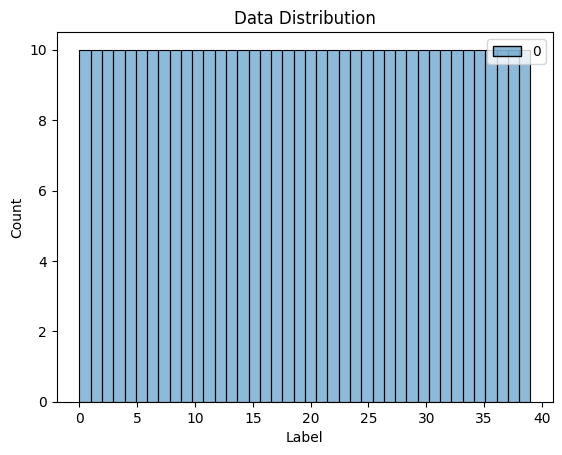

In [8]:

sns.histplot(target_df,bins=40)
plt.title("Data Distribution")
plt.xlabel("Label")

In [9]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

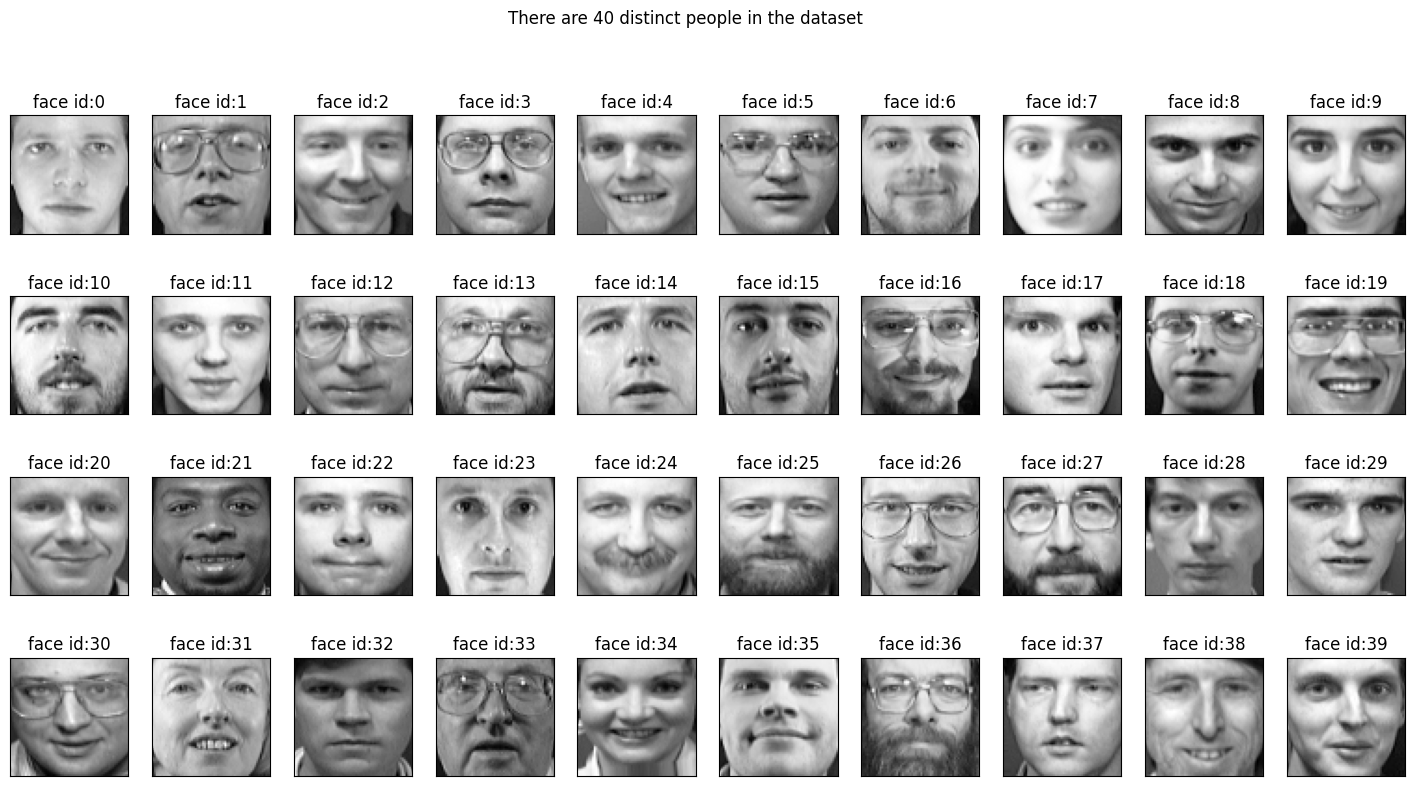

In [10]:
show_40_distinct_people(faces, np.unique(faces_target))

In [11]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

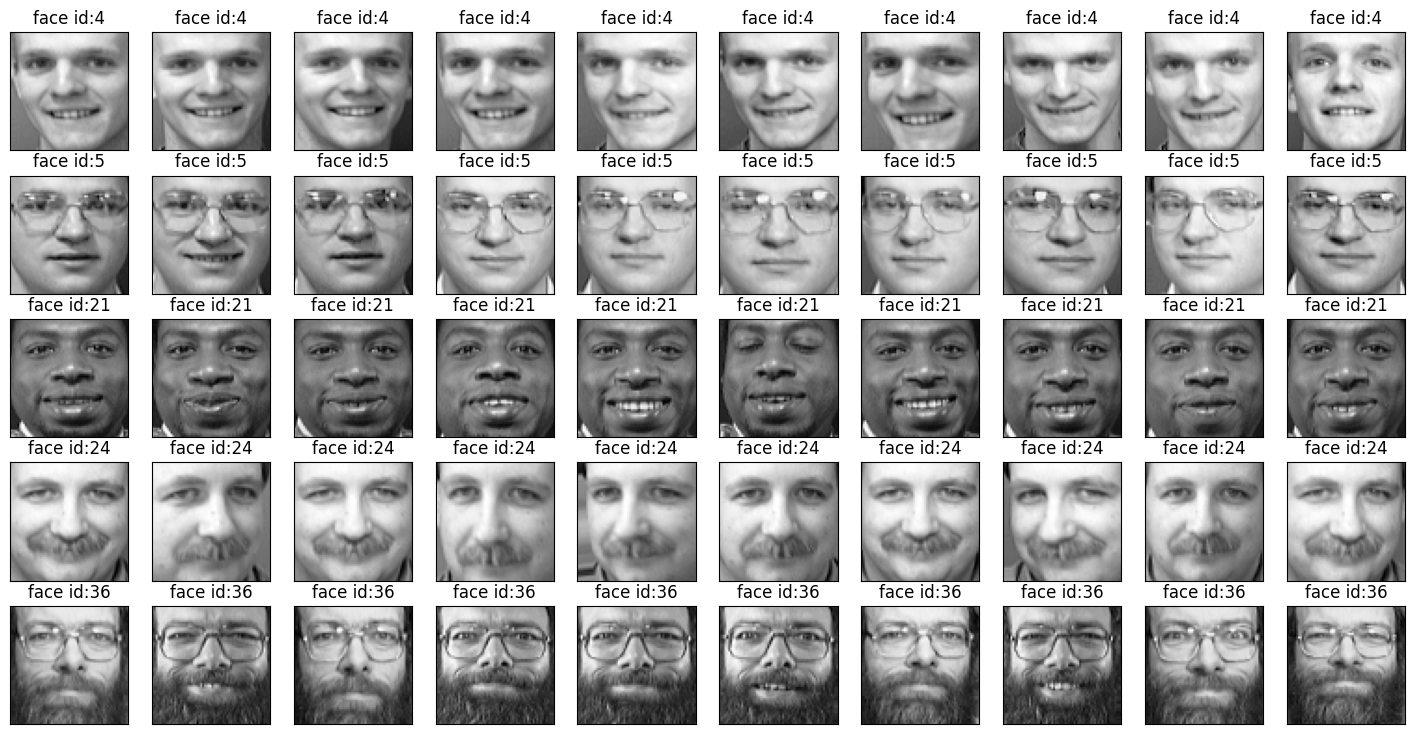

In [24]:
#You can playaround subject_ids to see other people faces
show_10_faces_of_n_subject(images=faces, subject_ids=[4,5, 21, 24, 36])

In [13]:
X, X_test, y, y_test=train_test_split(faces_df.values, faces_target, test_size=0.2
                                      , stratify=faces_target,shuffle=True, random_state=42)
print("X_train shape:",X.shape)
print("y_train shape:{}".format(y.shape))

X_train shape: (320, 4096)
y_train shape:(320,)


In [16]:
np.where(y_test == 4)

(array([38, 52]),)

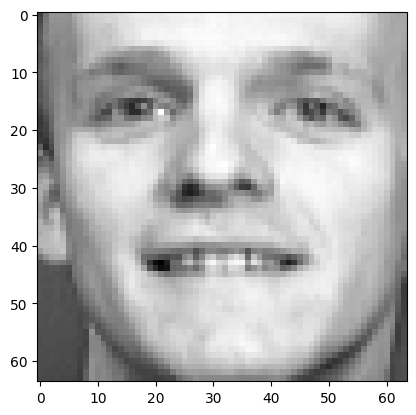

In [23]:

plt.imshow(X_test[38,:].reshape((64,64)),cmap='gray')
plt.savefig("id4.png")
plt.show()

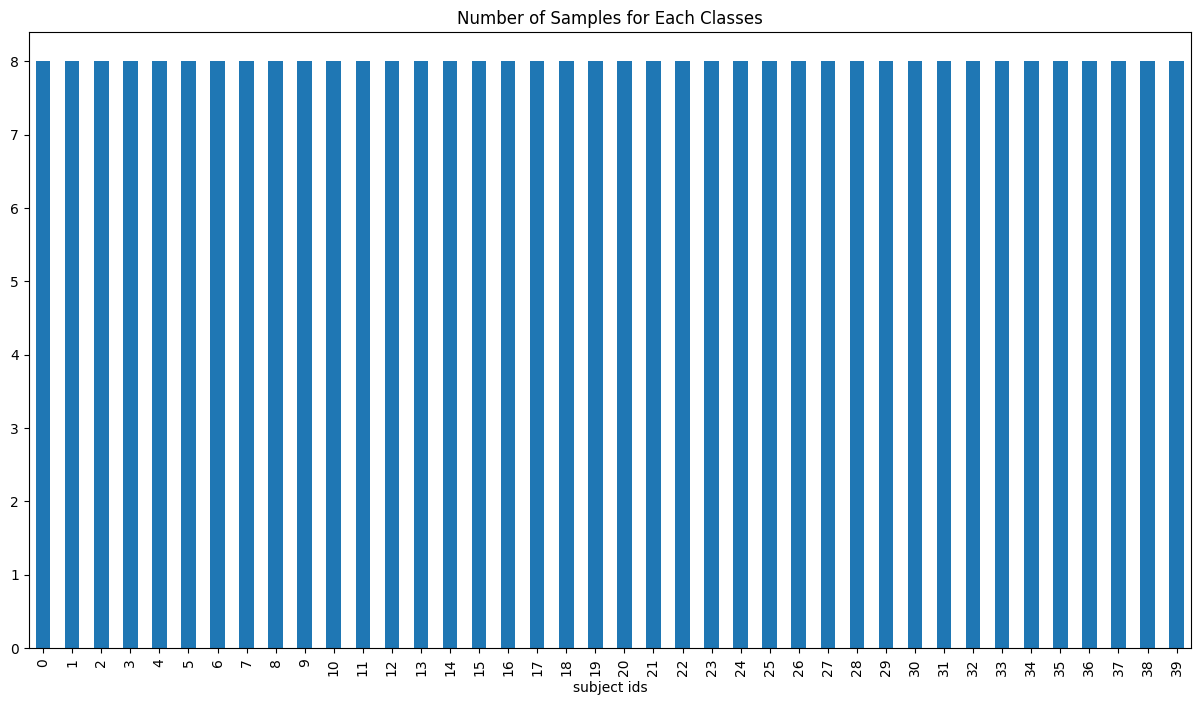

In [24]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")
plt.savefig('distribution.png')

In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score



In [26]:
def lda_model (X,y, lda_object):
    num_folds = 4

    # Create a stratified k-fold cross-validation object
    stratified_kfold = StratifiedKFold(n_splits=num_folds,random_state=42,shuffle=True)
    lda = lda_object
    accuracy1 = 0
    accuracy2 = 0
    initial_theta = None
    # Perform stratified k-fold cross-validation
    for train_index, test_index in stratified_kfold.split(X, y):
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]

        lda = lda_object

        #if initial_theta is not None:
            #lda.coef_ = initial_theta
        # Fit the model on the training data
        history = lda.fit(X_train, y_train)

        initial_theta = lda.coef_

        y_pred = lda.predict(X_val)

        # Calculate accuracy
        accuracy1 += accuracy_score(y_val, y_pred)
        
        y_pred = lda.predict(X_train)
        accuracy2 += accuracy_score(y_train, y_pred)
    print(f"Accuracy val: {accuracy1/4:.2f}")
    print(f"Accuracy train: {accuracy2/4:.2f}")
    return lda
    



In [27]:
lda_object = LinearDiscriminantAnalysis()
lda = lda_model(X,y,lda_object)


lda.fit(X, y)
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy test: {accuracy:.2f}")
lda = LinearDiscriminantAnalysis()

Accuracy val: 0.96
Accuracy train: 1.00
Accuracy test: 1.00


In [28]:

#lda = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, n_components=None, store_covariance=False)
param_grid = {
    'n_components': [1, 2, 3, 4, 5, 10, None], }
grid_search = GridSearchCV(lda, param_grid, cv=4,scoring="accuracy",verbose=1,n_jobs=-1)  # You can adjust the number of folds (cv) as needed

# Perform the grid search on your data
grid_search.fit(X, y)
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Parameters:  {'n_components': 1}
Best Accuracy:  0.96875


In [29]:

lda =  LinearDiscriminantAnalysis()
param_grid = {'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
               'solver': ['svd', 'lsqr', 'eigen'] 
             }
grid_search = GridSearchCV(lda, param_grid, cv=4,scoring="accuracy",verbose=1,n_jobs=-1)  # You can adjust the number of folds (cv) as needed

# Perform the grid search on your data
grid_search.fit(X, y)
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

results = grid_search.cv_results_



Fitting 4 folds for each of 15 candidates, totalling 60 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py", line 631, in fit
    self._solve_eigen(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/discriminant_analysis.py", line 463, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/opt/conda/lib/python3.10/site-package

Best Parameters:  {'shrinkage': 'auto', 'solver': 'lsqr'}
Best Accuracy:  0.978125


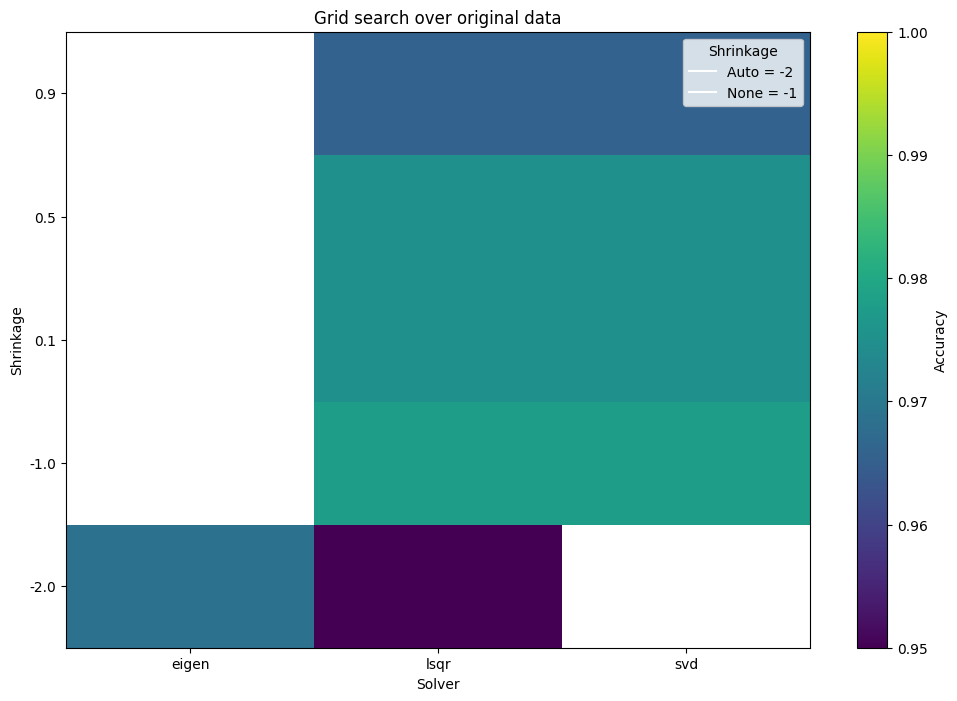

In [30]:

# Extract hyperparameters and scores from the grid search results
shrinkage_values = [params['shrinkage'] for params in results['params']]
solver_values = [params['solver'] for params in results['params']]
accuracy_scores = results['mean_test_score']

# Replace 'None' with a placeholder value for visualization purposes
shrinkage_values_numeric = [-1 if val is None else val if val != 'auto' else -2 for val in shrinkage_values]

# Encode solver values numerically
solver_encoder = LabelEncoder()
solver_values_numeric = solver_encoder.fit_transform(solver_values)

# Create a heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Reshape accuracy_scores into a 2D array for the heatmap
heatmap_data = np.array(accuracy_scores).reshape(len(np.unique(shrinkage_values_numeric)), len(np.unique(solver_values_numeric)))

cax = ax.imshow(heatmap_data, cmap='viridis', aspect='auto', origin='lower', vmin=0.95, vmax=1.0)

# Set ticks and labels
ax.set_xticks(np.arange(len(np.unique(solver_values_numeric))))
ax.set_yticks(np.arange(len(np.unique(shrinkage_values_numeric))))
ax.set_xticklabels(solver_encoder.classes_)
ax.set_yticklabels(np.unique(shrinkage_values_numeric))

# Set labels and title
ax.set_xlabel('Solver')
ax.set_ylabel('Shrinkage')

# Add colorbar
cbar = fig.colorbar(cax, label='Accuracy')

legend_elements = [plt.Line2D([0], [0], marker='', color='w', label='Auto = -2'),
                   plt.Line2D([0], [0], marker='', color='w', label='None = -1')]

ax.legend(handles=legend_elements, title='Shrinkage')
plt.title("Grid search over original data")
plt.savefig('grid_lda1.png')
plt.show()


In [31]:
#Best Parameters:  {'shrinkage': 'auto', 'solver': 'lsqr'}

In [32]:

lda_object = LinearDiscriminantAnalysis(shrinkage= 'auto', solver = 'lsqr',n_components =1)
lda = lda_model(X,y,lda_object)


lda.fit(X, y)
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy test: {accuracy:.2f}")
lda = LinearDiscriminantAnalysis()

Accuracy val: 0.98
Accuracy train: 1.00
Accuracy test: 0.99


<Figure size 640x480 with 0 Axes>

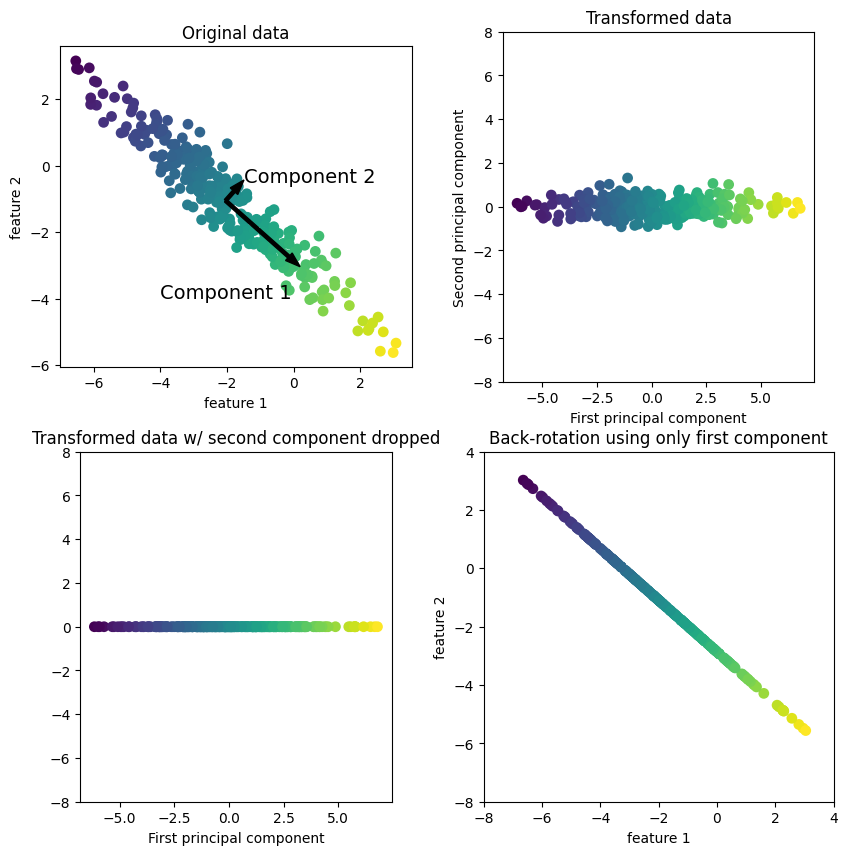

In [33]:
#!pip install mglearn

plt.figure()
mglearn.plots.plot_pca_illustration()
plt.savefig('pca.png')

In [34]:

X = faces_df.values
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

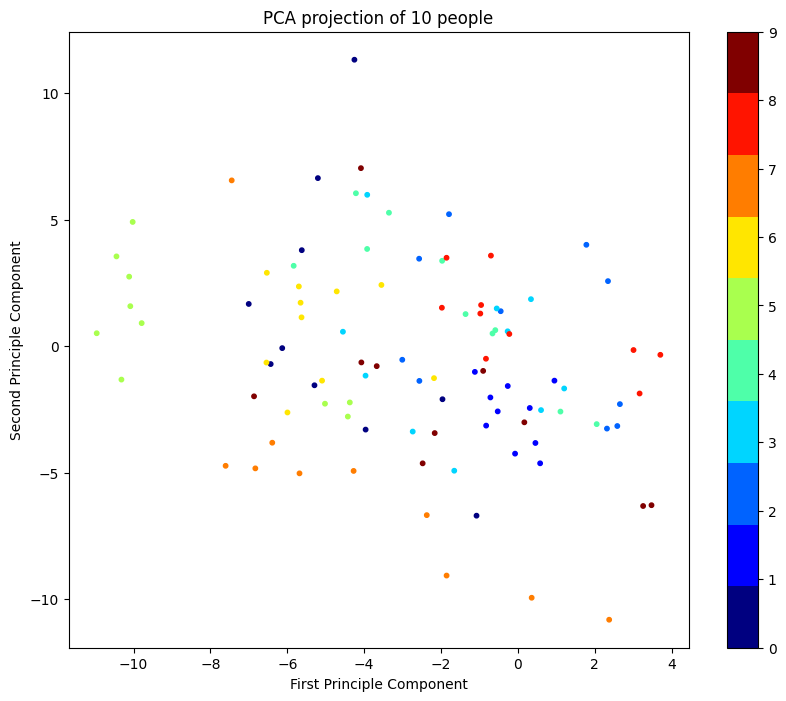

In [35]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=faces_target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)
plt.savefig('pca2.png')

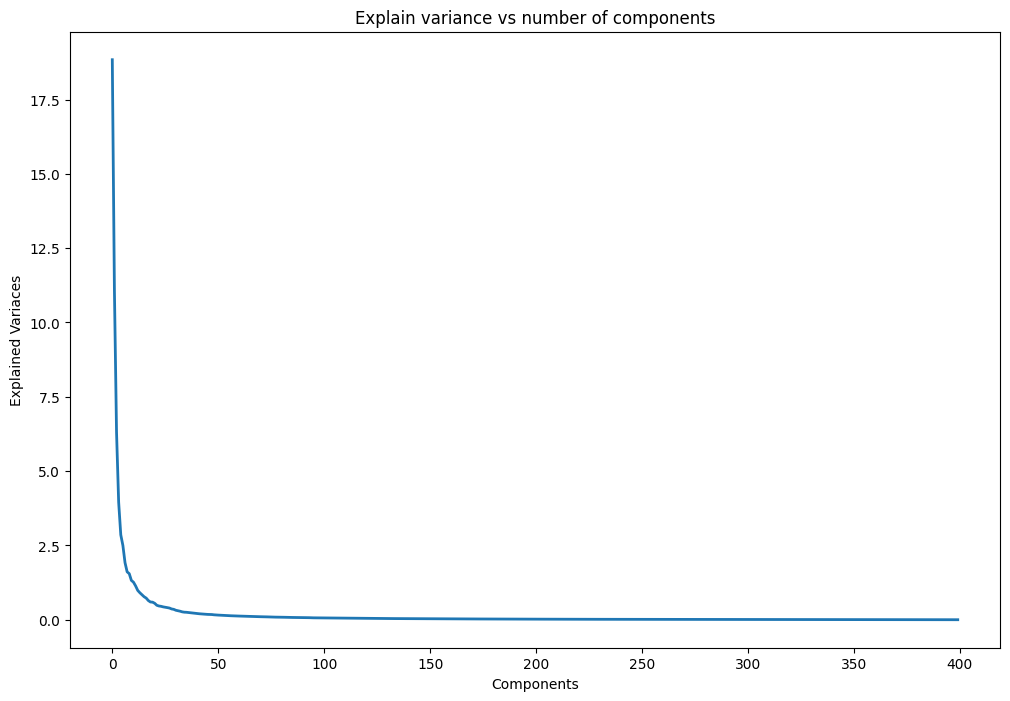

In [36]:
pca=PCA()
pca.fit(X)

plt.figure(figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.title("Explain variance vs number of components")
plt.savefig('pca3.png')
plt.show()



In [45]:

n_components=90
X = faces_df.values
pca=PCA(n_components=n_components)
pca.fit(X)
X_pca=pca.transform(X)


Text(0.5, 1.0, 'Average Face')

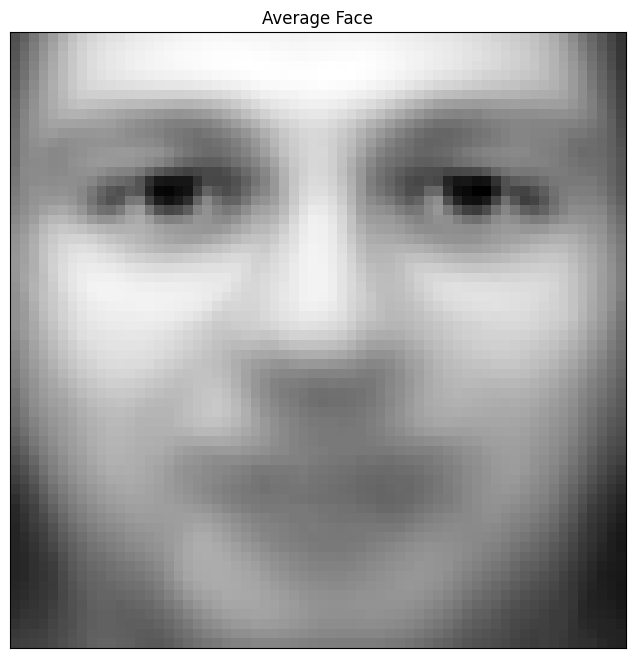

In [38]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

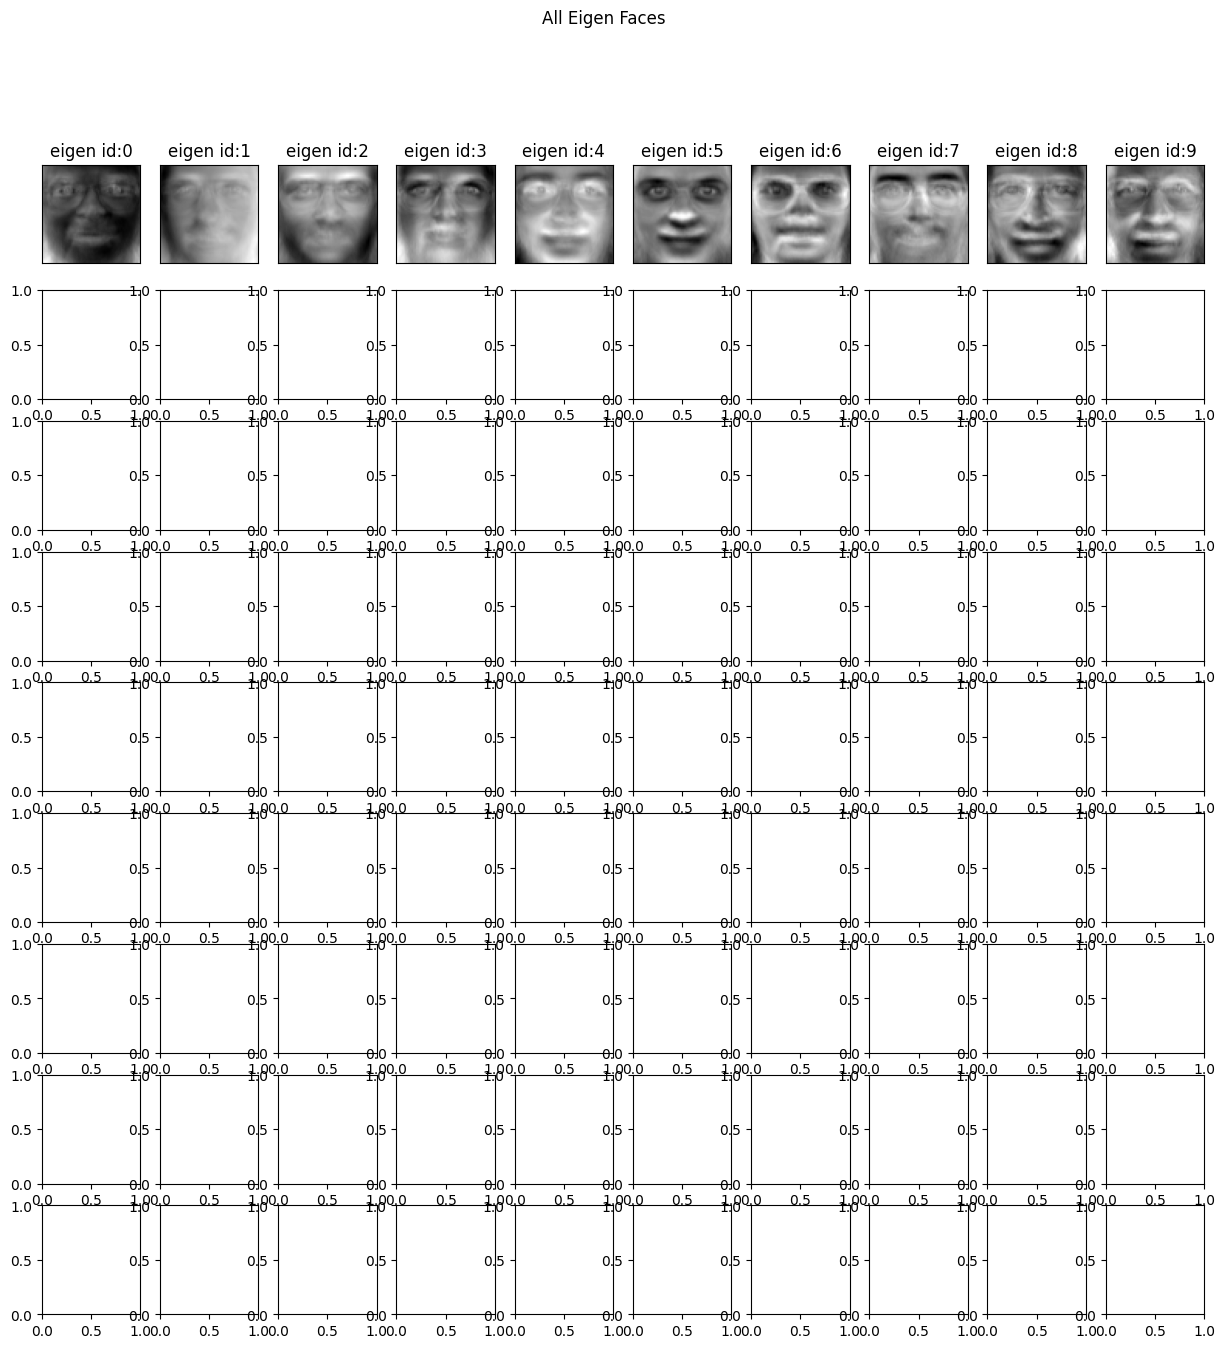

In [39]:

number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, faces.shape[1], faces.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(10):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [42]:
reconstructed_faces.shape

(400, 64, 64)

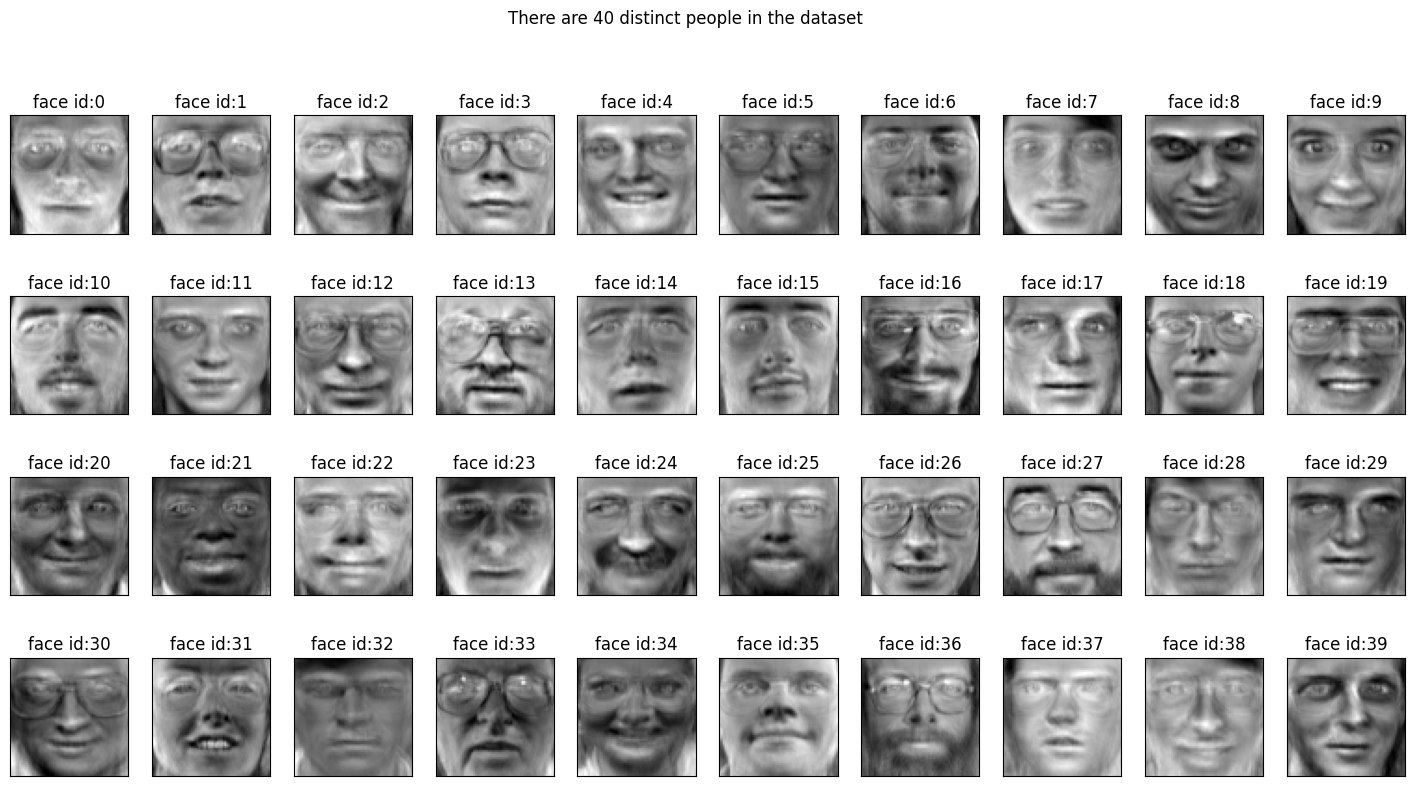

In [41]:
reconstructed_faces = np.dot(X_pca, eigen_faces.reshape(number_of_eigenfaces, -1)).reshape(faces.shape)

show_40_distinct_people(reconstructed_faces, np.unique(faces_target))

In [61]:
X_pca=pca.transform(X)
X_test_pca=pca.transform(X_test)
X_pca.shape


(400, 90)

In [47]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test=train_test_split(X_pca, faces_target, test_size=0.2, stratify=faces_target,shuffle=True, random_state=42)
lda =  LinearDiscriminantAnalysis()
param_grid = {'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
               'solver': ['svd', 'lsqr', 'eigen'] 
             }
grid_search = GridSearchCV(lda, param_grid, cv=4,scoring="accuracy",verbose=1,n_jobs=-1)  # You can adjust the number of folds (cv) as needed

# Perform the grid search on your data
#grid_search.fit(X_pca_train, y_pca_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

results = grid_search.cv_results_
#second Best Parameters:  {'n_components': 1, 'shrinkage': None,'solver': 'svd'}
#Best Parameters:  {'shrinkage': 0.1, 'solver': 'lsqr'}

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

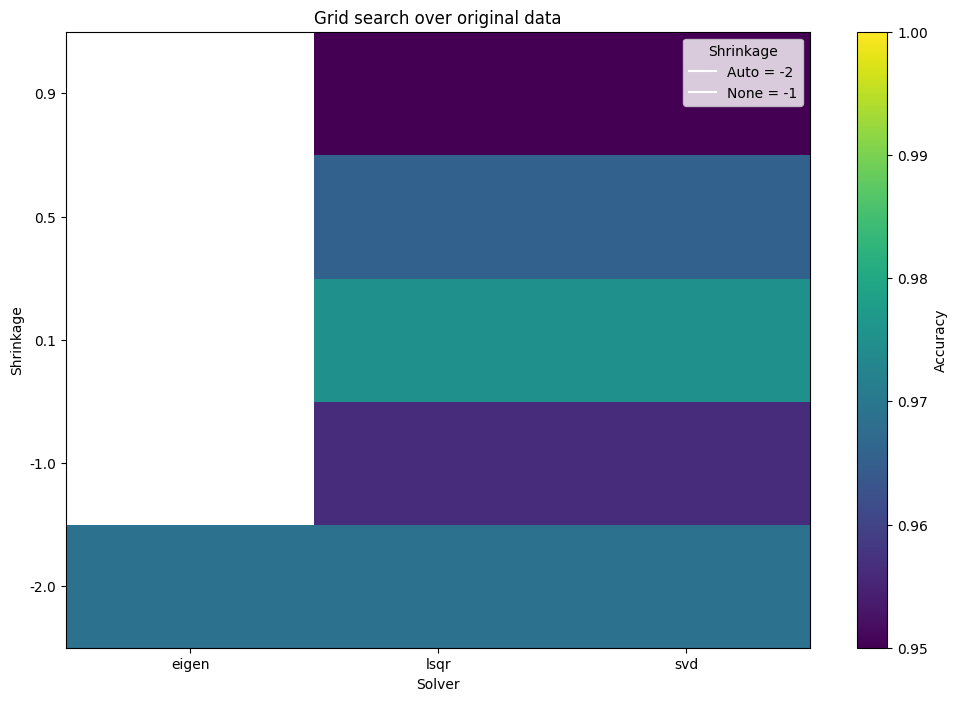

In [33]:

# Extract hyperparameters and scores from the grid search results
shrinkage_values = [params['shrinkage'] for params in results['params']]
solver_values = [params['solver'] for params in results['params']]
accuracy_scores = results['mean_test_score']

# Replace 'None' with a placeholder value for visualization purposes
shrinkage_values_numeric = [-1 if val is None else val if val != 'auto' else -2 for val in shrinkage_values]

# Encode solver values numerically
solver_encoder = LabelEncoder()
solver_values_numeric = solver_encoder.fit_transform(solver_values)

# Create a heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Reshape accuracy_scores into a 2D array for the heatmap
heatmap_data = np.array(accuracy_scores).reshape(len(np.unique(shrinkage_values_numeric)), len(np.unique(solver_values_numeric)))

cax = ax.imshow(heatmap_data, cmap='viridis', aspect='auto', origin='lower', vmin=0.95, vmax=1.0)

# Set ticks and labels
ax.set_xticks(np.arange(len(np.unique(solver_values_numeric))))
ax.set_yticks(np.arange(len(np.unique(shrinkage_values_numeric))))
ax.set_xticklabels(solver_encoder.classes_)
ax.set_yticklabels(np.unique(shrinkage_values_numeric))

# Set labels and title
ax.set_xlabel('Solver')
ax.set_ylabel('Shrinkage')

# Add colorbar
cbar = fig.colorbar(cax, label='Accuracy')

legend_elements = [plt.Line2D([0], [0], marker='', color='w', label='Auto = -2'),
                   plt.Line2D([0], [0], marker='', color='w', label='None = -1')]

ax.legend(handles=legend_elements, title='Shrinkage')
plt.title("Grid search over original data")
plt.savefig('grid_lda_pca.png')
plt.show()


In [62]:

lda_object = LinearDiscriminantAnalysis(solver = 'svd',n_components =2)
lda_final = lda_model(X_pca_train,y_pca_train,lda_object)


lda_final.fit(X_pca_train, y)
y_pred = lda_final.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy test: {accuracy:.2f}")

X.shape

Accuracy val: 0.96
Accuracy train: 1.00
Accuracy test: 0.99


(400, 4096)

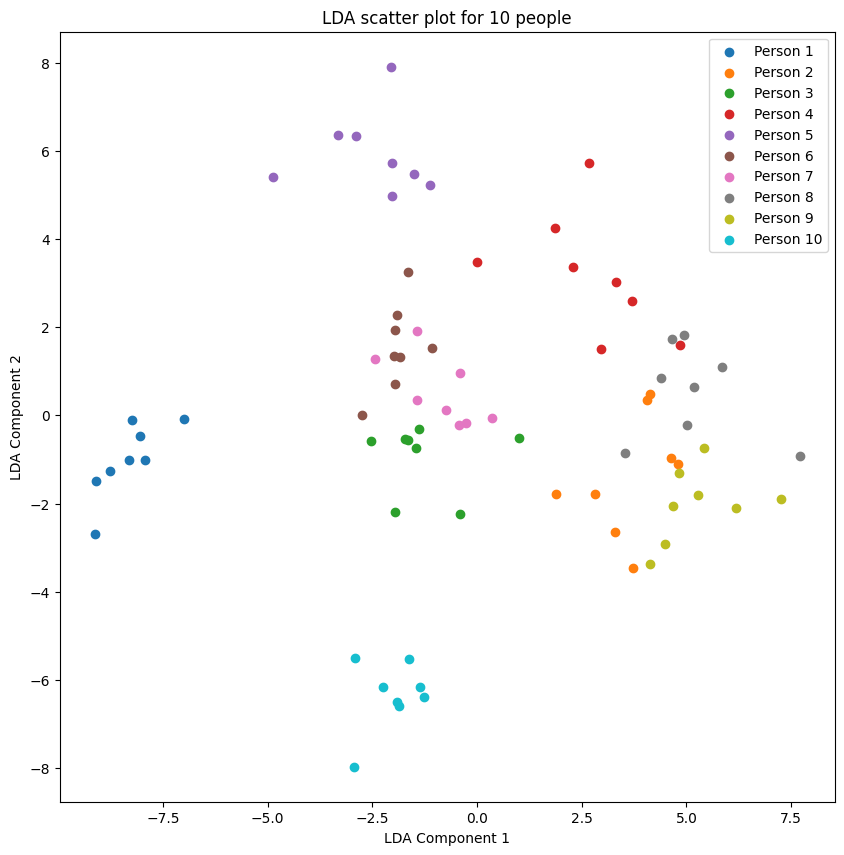

In [35]:
X_train, X_test, y_train, y_test=train_test_split(faces_df.values, faces_target, test_size=0.2, stratify=faces_target,shuffle=True, random_state=42)
X_lda_train = lda_object.fit_transform(X_train, y_train)
X_lda_test = lda_object.transform(X_test)


# Assuming you have X_train, X_test, y_train, and y_test

# Select only 10 people for visualization
selected_people = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
selected_indices_train = [i for i, label in enumerate(y_train) if label in selected_people]

# Filter data for the selected people
X_selected_train = X_train[selected_indices_train]
y_selected_train = y_train[selected_indices_train]

# Fit LDA model for dimensionality reduction
lda_object = LinearDiscriminantAnalysis(n_components=2)
X_lda_train = lda_object.fit_transform(X_selected_train, y_selected_train)
plt.figure(figsize=(10,10))
# Plot the 2D scatter plot for the selected people in the training data
for class_label in set(y_selected_train):
    plt.scatter(X_lda_train[y_selected_train == class_label, 0],
                X_lda_train[y_selected_train == class_label, 1],
                label=f'Person {class_label}')

plt.title('LDA scatter plot for 10 people')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()


plt.savefig('lda_plot.png')
plt.show()

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

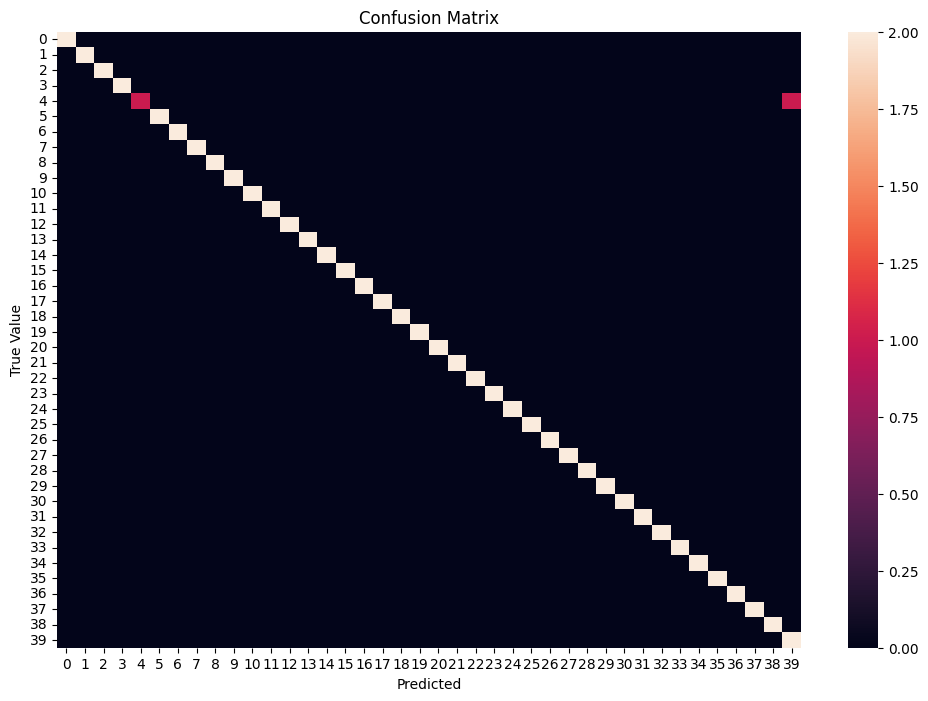

In [36]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(1, figsize=(12, 8))
sns.heatmap(cm, fmt='g')  

plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix')

plt

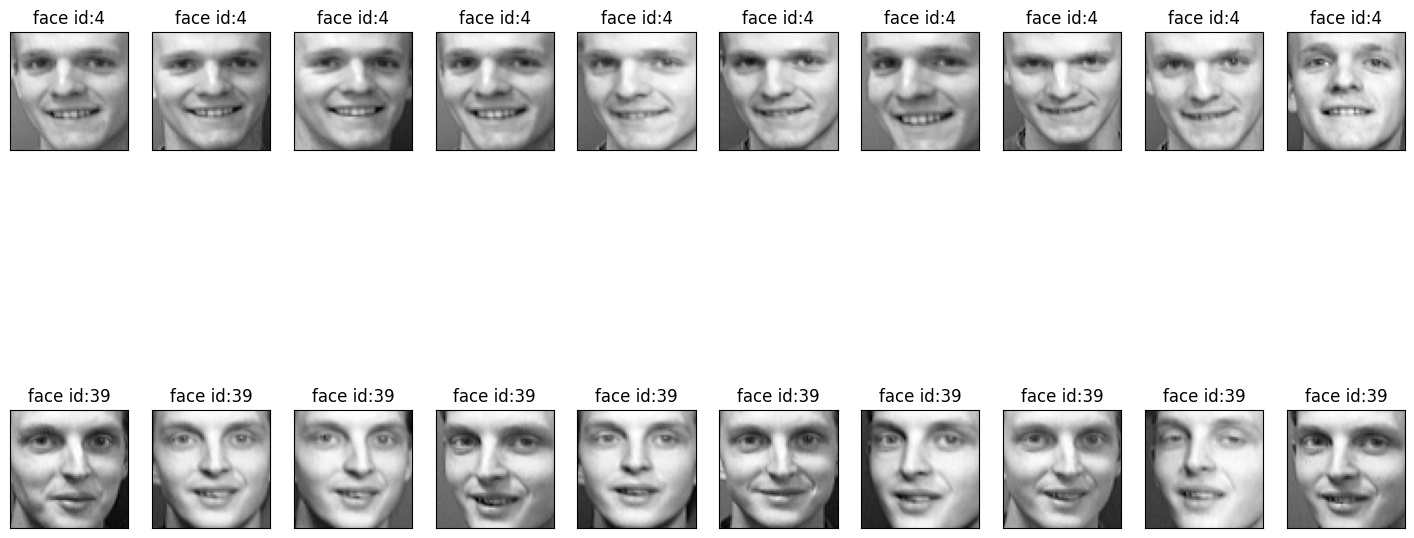

In [37]:
show_10_faces_of_n_subject(images=faces, subject_ids=[4,39])

In [48]:

# Apply LDA transformation to the training and testing data
lda_object = LinearDiscriminantAnalysis(n_components = 9)
lda = lda_model(X_pca_train,y_pca_train,lda_object)

X_train_lda = lda.transform(X_pca_train)
X_test_lda = lda.transform(X_pca_test)



Accuracy val: 0.96
Accuracy train: 1.00


In [50]:

y_test_one_hot = to_categorical(y_test, num_classes=40)


num_folds = 4
validation_accuracies = []
training_accuracies = []
test_accuracies = []
for k in list(range(1,16)):
    lda_object = LinearDiscriminantAnalysis(n_components = k)
    lda = lda_model(X_pca_train,y_pca_train,lda_object)

    X_train_lda = lda.transform(X_pca_train)
    X_test_lda = lda.transform(X_pca_test)

    # Evaluate the model on the test set
    model = tf.keras.Sequential([
            tf.keras.Input(shape=(X_train_lda.shape[1],)),
            tf.keras.layers.Dense(30, activation=tf.nn.leaky_relu),
            tf.keras.layers.Dense(40, activation=tf.nn.sigmoid )])
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    
        # Create a stratified k-fold cross-validation object
    stratified_kfold = StratifiedKFold(n_splits=num_folds,random_state=42,shuffle=True)


        # Train the model

    accuracy1 = 0
    accuracy2 = 0
    initial_theta = None
        # Perform stratified k-fold cross-validation
    for train_index, test_index in stratified_kfold.split(X_train_lda, y):
        X_train, X_val = X_train_lda[train_index], X_train_lda[test_index]
        y_train, y_val = y[train_index], y[test_index]
        y_train_one_hot = to_categorical(y_train, num_classes=40)   
        y_val_one_hot = to_categorical(y_val, num_classes=40) 

        history = model.fit(X_train, y_train_one_hot, epochs=60, verbose=0,batch_size = k)

        final_theta = model.get_weights()

        # Set the initial parameters for the next iteration
        model.set_weights(final_theta)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate accuracy for the validation set
        accuracy1 += np.mean(np.argmax(y_val_one_hot, axis=1) == np.argmax(y_pred, axis=1))

        # Predict on the training set
        y_pred_train = model.predict(X_train)

        # Calculate accuracy for the training set
        accuracy2 += np.mean(np.argmax(y_train_one_hot, axis=1) == np.argmax(y_pred_train, axis=1))
    # Average accuracy over folds
    accuracy1 /= num_folds
    accuracy2 /= num_folds
    
    validation_accuracies.append(accuracy1)
    training_accuracies.append(accuracy2)
    test_loss, test_accuracy = model.evaluate(X_test_lda, y_test_one_hot, verbose=0)
    test_accuracies.append(test_accuracy)

Accuracy val: 0.98
Accuracy train: 1.00
8/8 [==============================] - 0s 2ms/step


KeyboardInterrupt: 

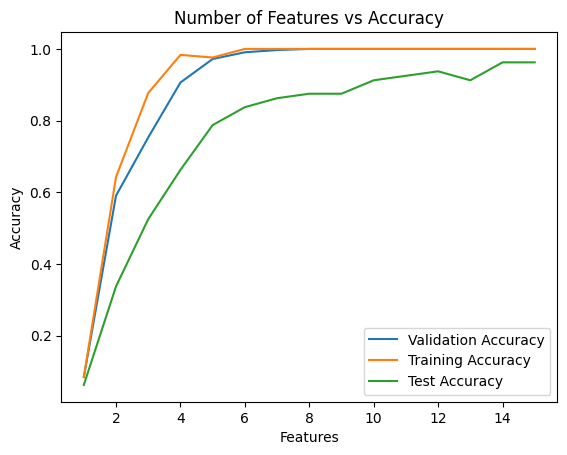

In [40]:
plt.plot(list(range(1,16)), validation_accuracies, label='Validation Accuracy')
plt.plot(list(range(1,16)), training_accuracies, label='Training Accuracy')
plt.plot(list(range(1,16)), test_accuracies, label='Test Accuracy')
plt.title('Number of Features vs Accuracy')
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('lda_nn.png')
plt.show()


Accuracy val: 0.96
Accuracy train: 1.00


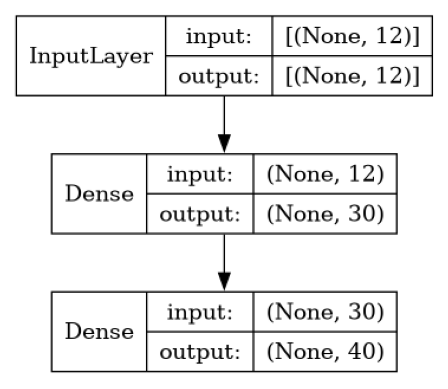

In [51]:

# Apply LDA transformation to the training and testing data
lda_object = LinearDiscriminantAnalysis(n_components = 12)
lda = lda_model(X_pca_train,y_pca_train,lda_object)

X_train_lda = lda.transform(X_pca_train)
X_test_lda = lda.transform(X_pca_test)




model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train_lda.shape[1],)),
        tf.keras.layers.Dense(30, activation=tf.nn.leaky_relu),
        tf.keras.layers.Dense(40, activation=tf.nn.sigmoid )
    ])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ["accuracy"])
y_one_hot = to_categorical(y, num_classes=40)  # Assuming you have 10 classes, adjust accordingly

    # Train the model
history = model.fit(X_train_lda, y_one_hot, epochs=150,verbose=0)

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=False)

# Display the image
img = plt.imread('model_architecture.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [42]:
test_loss, test_accuracy = model.evaluate(X_test_lda, y_test_one_hot, verbose=0)
test_accuracy

0.9750000238418579

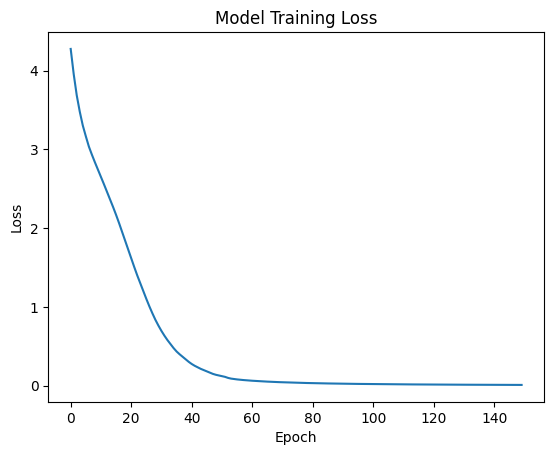

In [43]:
#tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('loss.png')
plt.show()


In [44]:
model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train_lda.shape[1],)),
        tf.keras.layers.Dense(30, activation=tf.nn.leaky_relu),
        tf.keras.layers.Dense(40, activation=tf.nn.sigmoid )
    ])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

num_folds = 4

    # Create a stratified k-fold cross-validation object
stratified_kfold = StratifiedKFold(n_splits=num_folds,random_state=42,shuffle=True)


    # Train the model

accuracy1 = 0
accuracy2 = 0
initial_theta = None
    # Perform stratified k-fold cross-validation
for train_index, test_index in stratified_kfold.split(X_train_lda, y):
    X_train, X_val = X_train_lda[train_index], X_train_lda[test_index]
    y_train, y_val = y[train_index], y[test_index]
    y_train_one_hot = to_categorical(y_train, num_classes=40)   
    y_val_one_hot = to_categorical(y_val, num_classes=40) 

    history = model.fit(X_train, y_train_one_hot, epochs=150, verbose=0)

    final_theta = model.get_weights()

    # Set the initial parameters for the next iteration
    model.set_weights(final_theta)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Calculate accuracy for the validation set
    accuracy1 += np.mean(np.argmax(y_val_one_hot, axis=1) == np.argmax(y_pred, axis=1))

    # Predict on the training set
    y_pred_train = model.predict(X_train)

    # Calculate accuracy for the training set
    accuracy2 += np.mean(np.argmax(y_train_one_hot, axis=1) == np.argmax(y_pred_train, axis=1))
# Average accuracy over folds
accuracy1 /= num_folds
accuracy2 /= num_folds

print(f"Average Accuracy (Validation): {accuracy1:.2%}")
print(f"Average Accuracy (Training): {accuracy2:.2%}")

8/8 [==============================] - 0s 2ms/step
Average Accuracy (Validation): 100.00%
Average Accuracy (Training): 100.00%


In [45]:
y_test_one_hot = to_categorical(y_test, num_classes=40)

# Evaluate the model on the test set
model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train_lda.shape[1],)),
        tf.keras.layers.Dense(30, activation=tf.nn.leaky_relu),
        tf.keras.layers.Dense(40, activation=tf.nn.sigmoid )])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

num_folds = 4
validation_accuracies = []
training_accuracies = []
test_accuracies = []
for k in [8,16,32,64,128]:
 
        # Create a stratified k-fold cross-validation object
    stratified_kfold = StratifiedKFold(n_splits=num_folds,random_state=42,shuffle=True)


        # Train the model

    accuracy1 = 0
    accuracy2 = 0
    initial_theta = None
        # Perform stratified k-fold cross-validation
    for train_index, test_index in stratified_kfold.split(X_train_lda, y):
        X_train, X_val = X_train_lda[train_index], X_train_lda[test_index]
        y_train, y_val = y[train_index], y[test_index]
        y_train_one_hot = to_categorical(y_train, num_classes=40)   
        y_val_one_hot = to_categorical(y_val, num_classes=40) 

        history = model.fit(X_train, y_train_one_hot, epochs=150, verbose=0,batch_size = k)

        final_theta = model.get_weights()

        # Set the initial parameters for the next iteration
        model.set_weights(final_theta)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate accuracy for the validation set
        accuracy1 += np.mean(np.argmax(y_val_one_hot, axis=1) == np.argmax(y_pred, axis=1))

        # Predict on the training set
        y_pred_train = model.predict(X_train)

        # Calculate accuracy for the training set
        accuracy2 += np.mean(np.argmax(y_train_one_hot, axis=1) == np.argmax(y_pred_train, axis=1))
    # Average accuracy over folds
    accuracy1 /= num_folds
    accuracy2 /= num_folds
    
    validation_accuracies.append(accuracy1)
    training_accuracies.append(accuracy2)
    test_loss, test_accuracy = model.evaluate(X_test_lda, y_test_one_hot, verbose=0)
    test_accuracies.append(test_accuracy)

8/8 [==============================] - 0s 1ms/step


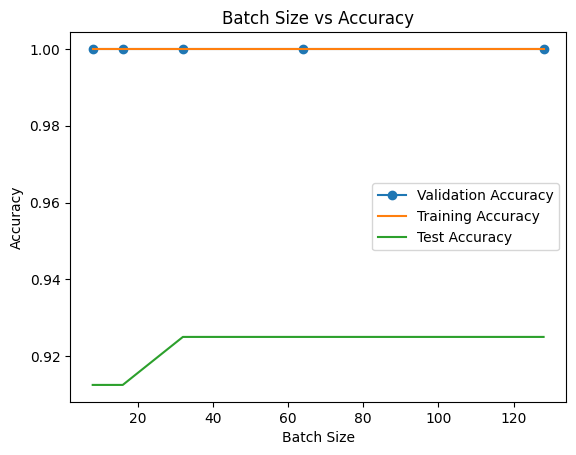

In [46]:
# Plotting
batch_sizes = [8,16,32,64,128]
plt.plot(batch_sizes, validation_accuracies, label='Validation Accuracy',marker = 'o')
plt.plot(batch_sizes, training_accuracies, label='Training Accuracy')
plt.plot(batch_sizes, test_accuracies, label='Test Accuracy')
plt.title('Batch Size vs Accuracy')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('batch.png')
plt.show()

In [47]:
test_loss, test_accuracy = model.evaluate(X_test_lda, y_test_one_hot, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2%}")

Test Loss: 0.3588
Test Accuracy: 92.50%


In [48]:

# Assuming X_train_lda is your input data and y is your target variable
# Assuming y_test and X_test_lda are your test data
# Assuming num_folds is defined

y_test_one_hot = to_categorical(y_test, num_classes=40)

# Hyperparameters
reg_params = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 10.0]

validation_accuracies = []
training_accuracies = []
test_accuracies = []
for reg_param in reg_params:

    # Create a stratified k-fold cross-validation object
    stratified_kfold = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)

    # Initialize model with L2 regularization
    model = Sequential([
        Dense(30, activation='relu', input_shape=(X_train_lda.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(reg_param)),
        Dense(40, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    accuracy1 = 0
    accuracy2 = 0

    # Perform stratified k-fold cross-validation
    for train_index, test_index in stratified_kfold.split(X_train_lda, y):
        X_train, X_val = X_train_lda[train_index], X_train_lda[test_index]
        y_train, y_val = y[train_index], y[test_index]
        y_train_one_hot = to_categorical(y_train, num_classes=40)
        y_val_one_hot = to_categorical(y_val, num_classes=40)

        history = model.fit(X_train, y_train_one_hot, epochs=150, verbose=0,batch_size = 128)

        final_theta = model.get_weights()

        # Set the initial parameters for the next iteration
        model.set_weights(final_theta)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate accuracy for the validation set
        accuracy1 += np.mean(np.argmax(y_val_one_hot, axis=1) == np.argmax(y_pred, axis=1))

        # Predict on the training set
        y_pred_train = model.predict(X_train)

        # Calculate accuracy for the training set
        accuracy2 += np.mean(np.argmax(y_train_one_hot, axis=1) == np.argmax(y_pred_train, axis=1))

    # Average accuracy over folds
    accuracy1 /= num_folds
    accuracy2 /= num_folds

    validation_accuracies.append(accuracy1)
    training_accuracies.append(accuracy2)

    print(f"Regularization Parameter: {reg_param}")
    print(f"Average Accuracy (Validation): {accuracy1:.2%}")
    print(f"Average Accuracy (Training): {accuracy2:.2%}")
    test_loss, test_accuracy = model.evaluate(X_test_lda, y_test_one_hot, verbose=0)

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.2%}")
    test_accuracies.append(test_accuracy)
# Now you have the lists validation_accuracies and training_accuracies for different regularization parameters.


8/8 [==============================] - 0s 2ms/step
Regularization Parameter: 1e-05
Average Accuracy (Validation): 99.69%
Average Accuracy (Training): 99.79%
Test Loss: 0.3949
Test Accuracy: 87.50%
8/8 [==============================] - 0s 1ms/step
Regularization Parameter: 0.0001
Average Accuracy (Validation): 100.00%
Average Accuracy (Training): 100.00%
Test Loss: 0.4314
Test Accuracy: 88.75%
8/8 [==============================] - 0s 1ms/step
Regularization Parameter: 0.001
Average Accuracy (Validation): 100.00%
Average Accuracy (Training): 99.90%
Test Loss: 0.2644
Test Accuracy: 95.00%
8/8 [==============================] - 0s 1ms/step
Regularization Parameter: 0.01
Average Accuracy (Validation): 100.00%
Average Accuracy (Training): 99.90%
Test Loss: 0.4510
Test Accuracy: 91.25%
8/8 [==============================] - 0s 1ms/step
Regularization Parameter: 0.1
Average Accuracy (Validation): 99.69%
Average Accuracy (Training): 99.69%
Test Loss: 0.5803
Test Accuracy: 90.00%
8/8 [========

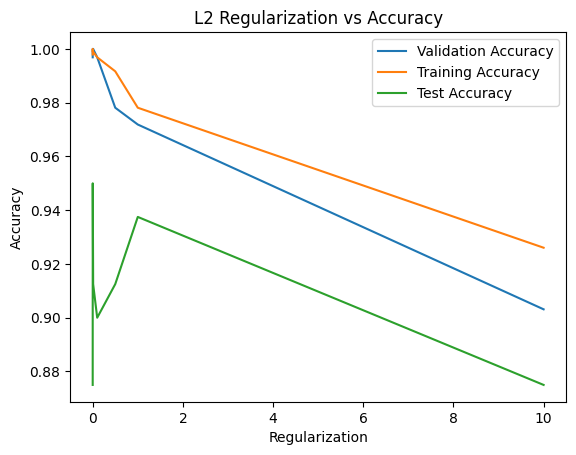

In [49]:
plt.plot(reg_params, validation_accuracies, label='Validation Accuracy')
plt.plot(reg_params, training_accuracies, label='Training Accuracy')
plt.plot(reg_params, test_accuracies, label='Test Accuracy')
plt.title('L2 Regularization vs Accuracy')
plt.xlabel('Regularization')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('reg.png')
plt.show()

In [50]:

# Assuming X_train_lda is your input data and y is your target variable
# Assuming y_test and X_test_lda are your test data
# Assuming num_folds is defined

y_test_one_hot = to_categorical(y_test, num_classes=40)

# Hyperparameters
units = list(range(20, 81))

validation_accuracies = []
training_accuracies = []
test_accuracies = []
for unit in units:

    # Create a stratified k-fold cross-validation object
    stratified_kfold = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)

    # Initialize model with L2 regularization
    model = Sequential([
        Dense(unit, activation='relu', input_shape=(X_train_lda.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(40, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    accuracy1 = 0
    accuracy2 = 0

    # Perform stratified k-fold cross-validation
    for train_index, test_index in stratified_kfold.split(X_train_lda, y):
        X_train, X_val = X_train_lda[train_index], X_train_lda[test_index]
        y_train, y_val = y[train_index], y[test_index]
        y_train_one_hot = to_categorical(y_train, num_classes=40)
        y_val_one_hot = to_categorical(y_val, num_classes=40)

        history = model.fit(X_train, y_train_one_hot, epochs=150, verbose=0, batch_size=128)

        final_theta = model.get_weights()

        # Set the initial parameters for the next iteration
        model.set_weights(final_theta)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate accuracy for the validation set
        accuracy1 += np.mean(np.argmax(y_val_one_hot, axis=1) == np.argmax(y_pred, axis=1))

        # Predict on the training set
        y_pred_train = model.predict(X_train)

        # Calculate accuracy for the training set
        accuracy2 += np.mean(np.argmax(y_train_one_hot, axis=1) == np.argmax(y_pred_train, axis=1))

    # Average accuracy over folds
    accuracy1 /= num_folds
    accuracy2 /= num_folds

    validation_accuracies.append(accuracy1)
    training_accuracies.append(accuracy2)

    print(f"Regularization Parameter: {reg_param}")
    print(f"Average Accuracy (Validation): {accuracy1:.2%}")
    print(f"Average Accuracy (Training): {accuracy2:.2%}")
    test_loss, test_accuracy = model.evaluate(X_test_lda, y_test_one_hot, verbose=0)

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.2%}")
    test_accuracies.append(test_accuracy)
# Now you have the lists validation_accuracies and training_accuracies for different regularization parameters.


8/8 [==============================] - 0s 1ms/step
Regularization Parameter: 10.0
Average Accuracy (Validation): 98.75%
Average Accuracy (Training): 99.38%
Test Loss: 0.6903
Test Accuracy: 88.75%
8/8 [==============================] - 0s 1ms/step
Regularization Parameter: 10.0
Average Accuracy (Validation): 99.37%
Average Accuracy (Training): 99.06%
Test Loss: 0.6861
Test Accuracy: 90.00%
8/8 [==============================] - 0s 1ms/step
Regularization Parameter: 10.0
Average Accuracy (Validation): 99.06%
Average Accuracy (Training): 98.96%
Test Loss: 0.6704
Test Accuracy: 91.25%
8/8 [==============================] - 0s 2ms/step
Regularization Parameter: 10.0
Average Accuracy (Validation): 99.37%
Average Accuracy (Training): 99.27%
Test Loss: 0.6616
Test Accuracy: 91.25%
8/8 [==============================] - 0s 2ms/step
Regularization Parameter: 10.0
Average Accuracy (Validation): 97.81%
Average Accuracy (Training): 99.48%
Test Loss: 0.6173
Test Accuracy: 90.00%
8/8 [===============

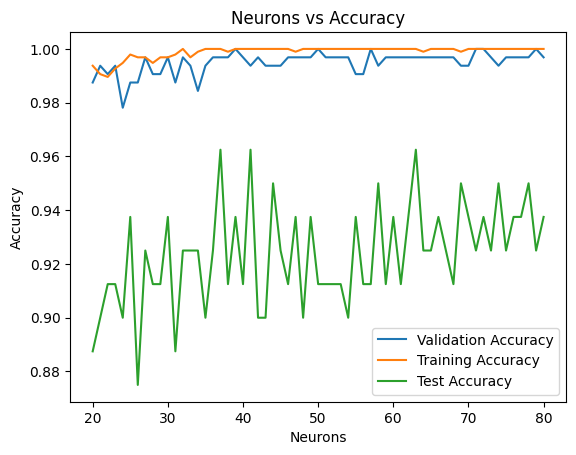

In [51]:
# Plotting
#30 neurons
plt.plot(units, validation_accuracies, label='Validation Accuracy')
plt.plot(units, training_accuracies, label='Training Accuracy')
plt.plot(units, test_accuracies, label='Test Accuracy')
plt.title('Neurons vs Accuracy')
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('neurons.png')
plt.show()

In [52]:

# Assuming X_train_lda is your input data and y is your target variable
# Assuming y_test and X_test_lda are your test data
# Assuming num_folds is defined

y_test_one_hot = to_categorical(y_test, num_classes=40)

# Activation functions to try for both layers
activation_functions_layer1 = ['relu', 'sigmoid', 'tanh','leaky_relu']
activation_functions_layer2 = ['sigmoid', 'softmax']

validation_accuracies = []
training_accuracies = []
test_accuracies = []

for activation_function_layer1 in activation_functions_layer1:
    for activation_function_layer2 in activation_functions_layer2:
         # Initialize model with the current activation functions for both layers
        model = tf.keras.Sequential([
            tf.keras.Input(shape=(X_train_lda.shape[1],)),
            tf.keras.layers.Dense(30, activation=activation_function_layer1,kernel_regularizer=tf.keras.regularizers.l2(0.1)),
            tf.keras.layers.Dense(40, activation=activation_function_layer2 )
        ])

        # Create a stratified k-fold cross-validation object
        stratified_kfold = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)

        accuracy1 = 0
        accuracy2 = 0
        

        # Perform stratified k-fold cross-validation
        for train_index, test_index in stratified_kfold.split(X_train_lda, y):
            X_train, X_val = X_train_lda[train_index], X_train_lda[test_index]
            y_train, y_val = y[train_index], y[test_index]
            y_train_one_hot = to_categorical(y_train, num_classes=40)
            y_val_one_hot = to_categorical(y_val, num_classes=40)

           
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

            history = model.fit(X_train, y_train_one_hot, epochs=150, verbose=0, batch_size=128)

            final_theta = model.get_weights()

            # Set the initial parameters for the next iteration
            model.set_weights(final_theta)

            # Predict on the validation set
            y_pred = model.predict(X_val)

            # Calculate accuracy for the validation set
            accuracy1 += np.mean(np.argmax(y_val_one_hot, axis=1) == np.argmax(y_pred, axis=1))

            # Predict on the training set
            y_pred_train = model.predict(X_train)

            # Calculate accuracy for the training set
            accuracy2 += np.mean(np.argmax(y_train_one_hot, axis=1) == np.argmax(y_pred_train, axis=1))

        # Average accuracy over folds
        accuracy1 /= num_folds
        accuracy2 /= num_folds

        validation_accuracies.append(accuracy1)
        training_accuracies.append(accuracy2)

        print(f"Activation Function Layer 1: {activation_function_layer1}")
        print(f"Activation Function Layer 2: {activation_function_layer2}")
        print(f"Average Accuracy (Validation): {accuracy1:.2%}")
        print(f"Average Accuracy (Training): {accuracy2:.2%}")
        test_loss, test_accuracy = model.evaluate(X_test_lda, y_test_one_hot, verbose=0)

        print(f"Test Loss: {test_loss:.4f}")
        print(f"Test Accuracy: {test_accuracy:.2%}")
        test_accuracies.append(test_accuracy)

# Now you have the lists validation_accuracies and training_accuracies for different activation functions in both layers.


8/8 [==============================] - 0s 1ms/step
Activation Function Layer 1: relu
Activation Function Layer 2: sigmoid
Average Accuracy (Validation): 99.69%
Average Accuracy (Training): 99.79%
Test Loss: 0.3461
Test Accuracy: 93.75%
8/8 [==============================] - 0s 2ms/step
Activation Function Layer 1: relu
Activation Function Layer 2: softmax
Average Accuracy (Validation): 99.06%
Average Accuracy (Training): 99.90%
Test Loss: 0.3388
Test Accuracy: 93.75%
8/8 [==============================] - 0s 1ms/step
Activation Function Layer 1: sigmoid
Activation Function Layer 2: sigmoid
Average Accuracy (Validation): 96.88%
Average Accuracy (Training): 97.71%
Test Loss: 0.9857
Test Accuracy: 92.50%
8/8 [==============================] - 0s 2ms/step
Activation Function Layer 1: sigmoid
Activation Function Layer 2: softmax
Average Accuracy (Validation): 96.88%
Average Accuracy (Training): 97.60%
Test Loss: 0.9797
Test Accuracy: 92.50%
8/8 [==============================] - 0s 1ms/step

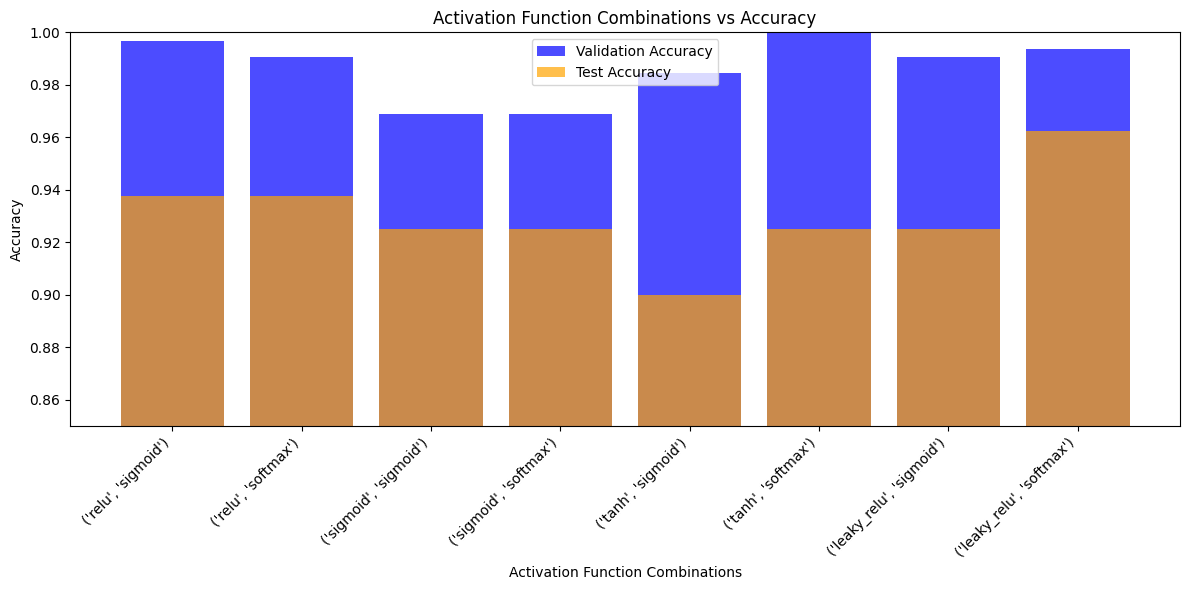

In [53]:

# Assuming you have the lists: activation_functions_layer1, activation_functions_layer2, validation_accuracies, and test_accuracies

# Combine activation functions for both layers
activation_combinations = [(act1, act2) for act1 in activation_functions_layer1 for act2 in activation_functions_layer2]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart for validation accuracies
ax.bar(range(len(activation_combinations)), validation_accuracies, align='center', alpha=0.7, color='blue', label='Validation Accuracy')
# Bar chart for test accuracies
ax.bar(range(len(activation_combinations)), test_accuracies, align='center', alpha=0.7, color='orange', label='Test Accuracy')

# X-axis labels
ax.set_xticks(range(len(activation_combinations)))
ax.set_xticklabels(activation_combinations, rotation=45, ha='right')

# Title and labels
ax.set_title('Activation Function Combinations vs Accuracy')
ax.set_xlabel('Activation Function Combinations')
ax.set_ylabel('Accuracy')

# Set custom y-axis limit (adjust as needed)
plt.ylim(0.85, 1.0)

# Legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.savefig('activation.png')
plt.show()


In [54]:

model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train_lda.shape[1],)),
        tf.keras.layers.Dense(30, activation=tf.nn.sigmoid,kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(40, activation=tf.nn.sigmoid )
    ])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

num_folds = 4

    # Create a stratified k-fold cross-validation object
stratified_kfold = StratifiedKFold(n_splits=num_folds,random_state=42,shuffle=True)


    # Train the model

accuracy1 = 0
accuracy2 = 0

initial_theta = None
    # Perform stratified k-fold cross-validation
for train_index, test_index in stratified_kfold.split(X_train_lda, y):
    X_train, X_val = X_train_lda[train_index], X_train_lda[test_index]
    y_train, y_val = y[train_index], y[test_index]
    y_train_one_hot = to_categorical(y_train, num_classes=40)   
    y_val_one_hot = to_categorical(y_val, num_classes=40) 
    history = model.fit(X_train, y_train_one_hot, epochs=150, verbose=0,batch_size=128)

    final_theta = model.get_weights()

    # Set the initial parameters for the next iteration
    model.set_weights(final_theta)
    
    y_pred_test = model.predict(X_test_lda)
    
    
    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Calculate accuracy for the validation set
    accuracy1 += np.mean(np.argmax(y_val_one_hot, axis=1) == np.argmax(y_pred, axis=1))

    # Predict on the training set
    y_pred_train = model.predict(X_train)

    # Calculate accuracy for the training set
    accuracy2 += np.mean(np.argmax(y_train_one_hot, axis=1) == np.argmax(y_pred_train, axis=1))
    
# Average accuracy over folds
accuracy1 /= num_folds
accuracy2 /= num_folds

print(f"Average Accuracy (Validation): {accuracy1:.2%}")
print(f"Average Accuracy (Training): {accuracy2:.2%}")


8/8 [==============================] - 0s 2ms/step
Average Accuracy (Validation): 99.06%
Average Accuracy (Training): 98.54%


In [55]:
y_test_one_hot = to_categorical(y_test, num_classes=40) 
y_pred_test = model.predict(X_test_lda)
accuracy3 = np.mean(np.argmax(y_test_one_hot, axis=1) == np.argmax(y_pred_test, axis=1))
print(f"Average Accuracy (Test): {accuracy3:.2%}")

3/3 [==============================] - 0s 3ms/step
Average Accuracy (Test): 95.00%


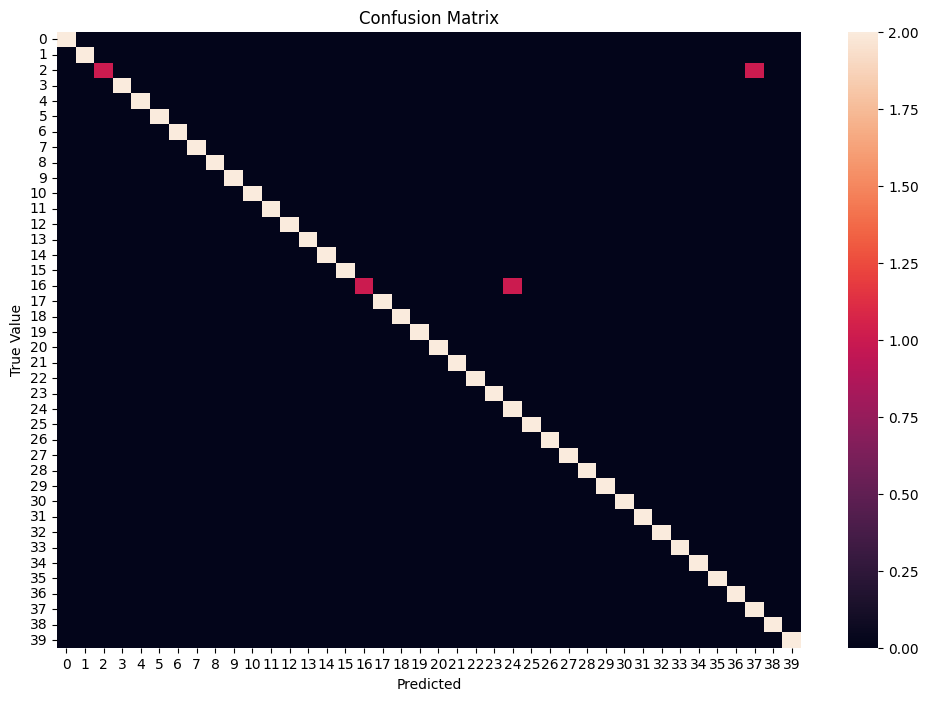

In [57]:
# Compute confusion matrix
cm = confusion_matrix(y_test, np.argmax(y_pred_test, axis=1))

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, fmt='g') 

plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix')

plt.savefig('final_nn.png')

In [61]:
y_prob1
roc_auc1

0.9892628205128204

In [65]:

y_prob1 = model.predict(X_test_lda)
y_prob1 = np.argmax(y_pred_test, axis=1)

roc_auc1 = roc_auc_score( to_categorical(y_test), model.predict(X_test_lda), multi_class='ovr')




plot_roc_curve(model, X_test_lda, to_categorical(y_test), ax=ax, name='Model 1')

# You can add more models if needed
# plot_roc_curve(classifier2, X_test_lda, y_test_one_hot, ax=ax, name='Model 2')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Model')
plt.legend(loc='lower right')
plt.show()


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/opt/conda/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

In [67]:
#models from another notebook
X, X_test, y, y_test=train_test_split(faces_df.values, faces_target, test_size=0.2
                                      , stratify=faces_target,shuffle=True, random_state=42)

modelTest = LogisticRegression(solver='liblinear', penalty='l2',C=20, max_iter=1000)
modelTest.fit(X, y)

LogisticRegression(C=20, max_iter=1000, solver='liblinear')

In [87]:
from sklearn.svm import SVC
svm = SVC(C = 0.1,kernel = 'linear',probability=True)
svm.fit(X,y)

SVC(C=0.1, kernel='linear', probability=True)

In [85]:
y_probs3

array([ 1, 35, 18, 16, 39, 23, 32, 19,  3, 34, 25, 27, 39, 29,  7, 35, 21,
       34, 11, 36, 26, 19, 22, 22, 38, 10, 31, 12, 10,  5, 27, 38, 15, 21,
       37, 25, 20, 14,  5,  0, 12,  2,  8,  2, 17, 30, 14, 23, 31,  6,  9,
       16,  4,  8, 37, 13, 32, 20, 18, 30, 33, 24, 29, 28, 33, 17,  3, 13,
       11, 36,  5, 28,  7,  1, 26,  0, 15,  7,  6, 24], dtype=int32)

3/3 [==============================] - 0s 2ms/step


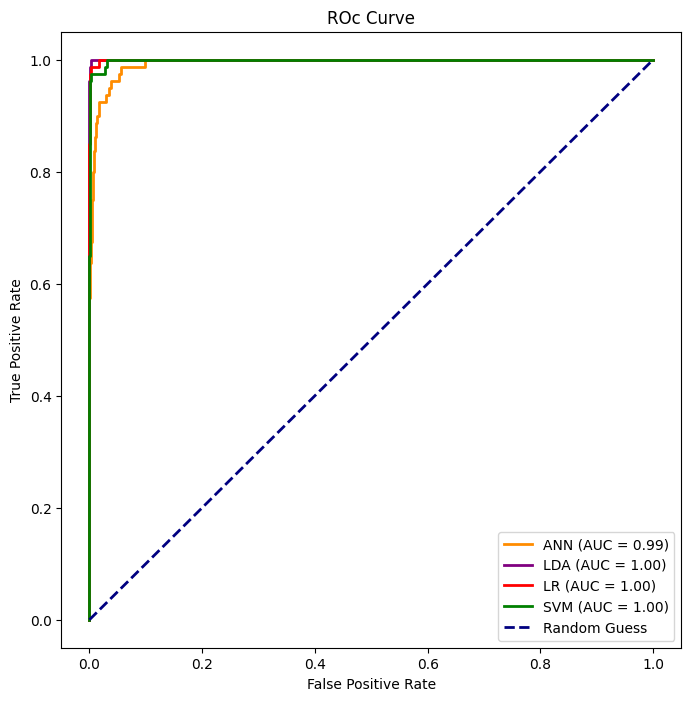

In [90]:
faces = np.load("/kaggle/input/olivetti/olivetti_faces.npy")
faces_target = np.load("/kaggle/input/olivetti/olivetti_faces_target.npy")


y_test_one_hot = to_categorical(y_test)

y_probs = model.predict(X_test_lda)


fpr1, tpr1, _ = roc_curve(y_test_one_hot.ravel(), y_probs.ravel())
roc_auc1 = auc(fpr1, tpr1)


y_probs1 = lda_final.predict_proba(X_test_pca)

fpr2, tpr2, _ = roc_curve(y_test_one_hot.ravel(), y_probs1.ravel())
roc_auc2 = auc(fpr2, tpr2)



y_probs2 =  modelTest.predict_proba(X_test)
fpr3, tpr3, _ = roc_curve(y_test_one_hot.ravel(), y_probs2.ravel())
roc_auc3 = auc(fpr3, tpr3)

y_probs3 =  svm.predict_proba(X_test)
fpr4, tpr4, _ = roc_curve(y_test_one_hot.ravel(), y_probs3.ravel())
roc_auc4 = auc(fpr4, tpr4)



plt.figure(figsize=(8, 8))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'ANN (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='purple', lw=2, label=f'LDA (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, color='red', lw=2, label=f'LR (AUC = {roc_auc2:.2f})')
plt.plot(fpr4, tpr4, color='green', lw=2, label=f'SVM (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROc Curve')
plt.legend(loc='lower right')
plt.savefig("ROC.png")
plt.show()
